In [1]:
# Import the libraries needed to process the data and train the model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
# Number of rows and columns
print(f"Number of rows and column{df.shape}\n")
# Number of missing values
print(f"Number of missing value\n{df.isna().sum()}\n")
# Number of duplicate values
print(f"Number of duplicated value {df.duplicated().sum()}")


Number of rows and column(640840, 10)

Number of missing value
Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

Number of duplicated value 0


In [4]:
df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [5]:
df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [6]:
df.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [7]:
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [8]:
# Convert column type to datetime
df["date"] = pd.to_datetime(df["date"])


In [9]:
# Decode and convert the date into 3 parts (day, month and year)
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [10]:
# Delete date column after it has been replaced
df.drop(columns=['date'], inplace=True)

In [11]:
# Convert the "state_holiday" column to a numeric format
df["state_holiday"] = df["state_holiday"].astype("category").cat.codes

In [12]:
df.head()

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year
0,425390,366,4,517,1,0,0,0,4422,18,4,2013
1,291687,394,6,694,1,0,0,0,8297,11,4,2015
2,411278,807,4,970,1,1,0,0,9729,29,8,2013
3,664714,802,2,473,1,1,0,0,6513,28,5,2013
4,540835,726,4,1068,1,1,0,0,10882,10,10,2013


In [13]:
df.dtypes

index                  int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday           int8
school_holiday         int64
sales                  int64
day                    int32
month                  int32
year                   int32
dtype: object

In [14]:
# Define features (X) and target variable (y)
X = df.drop(columns=["sales","index"])  # Features: all columns except target
y = df["sales"]  # Target variable

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"✅ Data successfully split!")
print(f"📊 Training set size: {X_train.shape[0]} samples")
print(f"📊 Testing set size: {X_test.shape[0]} samples")

✅ Data successfully split!
📊 Training set size: 512672 samples
📊 Testing set size: 128168 samples


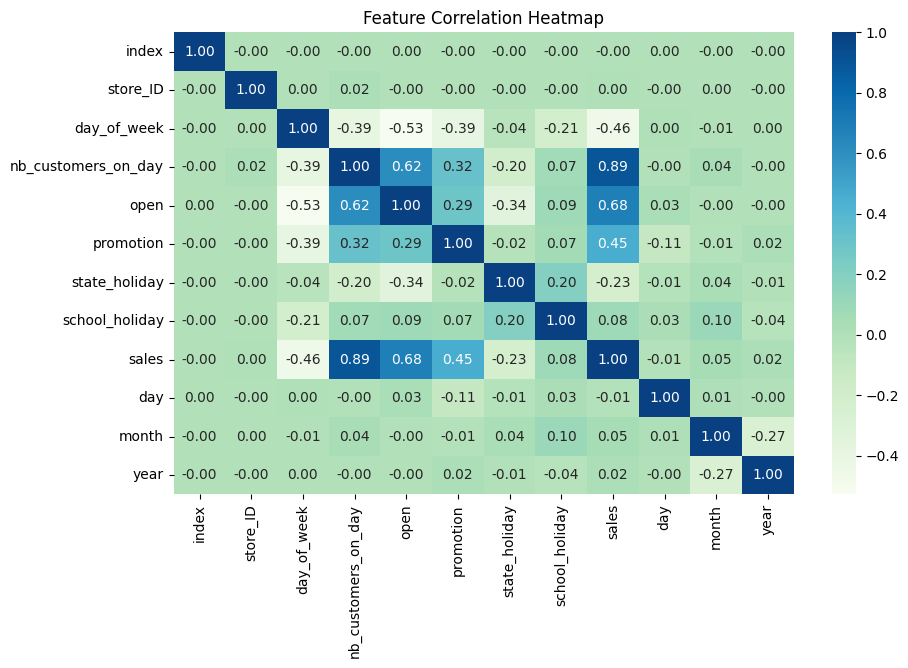

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="GnBu", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# MODEL TRAINING AND EVALUTION "REGRESSION"

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
}

# store results
results = {}

# Train & Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MEAN ABSOLUTE ERROR": round(mae, 2), "MEAN SQUARED ERROR": round(mse, 2), "R2 SCORE": round(r2, 2)}


results_df = pd.DataFrame(results)

In [17]:
results_df.head()

,Linear Regression,Decision Tree,KNN,Random Forest,XGBoost
MEAN ABSOLUTE ERROR,987.96,683.68,839.35,535.57,676.01
MEAN SQUARED ERROR,2187686.85,1419568.72,1729407.08,758321.07,984954.75
R2 SCORE,0.85,0.90,0.88,0.95,0.93


In [18]:
best_model_name = max(results, key=lambda x: results[x]["R2 SCORE"])
best_score = results[best_model_name]["R2 SCORE"]
best_model = models[best_model_name]


print(f"Best model: {best_model_name}")
print(f"Best R² Score: {best_score}")

Best model: Random Forest
Best R² Score: 0.95


In [19]:
y_pred = best_model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(mae)
print(mse)
print(r2)


535.5673061138507
758321.0688500865
0.9486985223007606


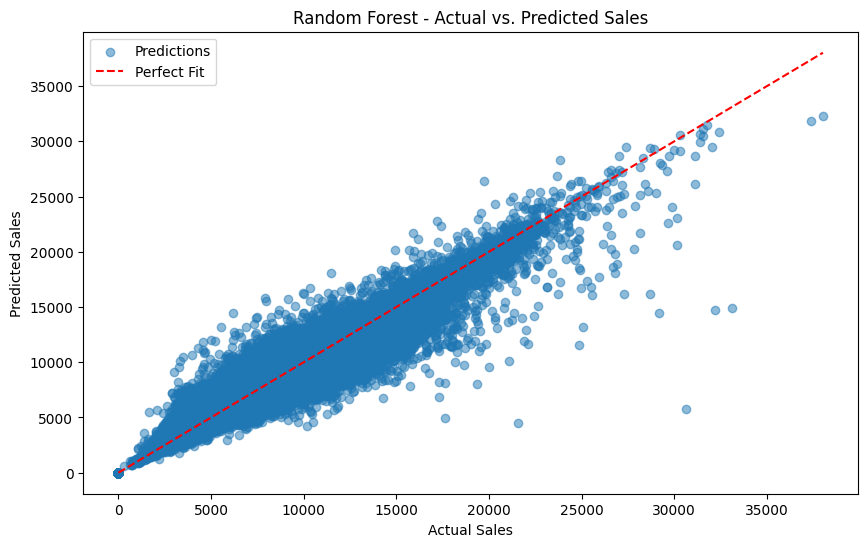

In [22]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Scatter plot: Actual vs. Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"{best_model_name} - Actual vs. Predicted Sales")
plt.legend()
plt.show()

# REAL DATA

In [23]:
test_df = pd.read_csv('REAL_DATA.csv')
test_df.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [24]:
print(f"Number of rows and column{test_df.shape}\n")
print(f"Number of missing value\n{test_df.isna().sum()}\n")
print(f"Number of duplicated value {test_df.duplicated().sum()}")


Number of rows and column(71205, 9)

Number of missing value
index                  0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
dtype: int64

Number of duplicated value 0


In [25]:
test_df.dtypes

index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [26]:
test_df["date"] = pd.to_datetime(test_df["date"], format="%d/%m/%Y", dayfirst=True)

In [27]:
test_df['day'] = test_df['date'].dt.day
test_df['month'] = test_df['date'].dt.month
test_df['year'] = test_df['date'].dt.year

In [28]:
test_df.drop(columns=['date'], inplace=True)

In [29]:
test_df["state_holiday"] = test_df["state_holiday"].astype("category").cat.codes

In [30]:
test_df.head()

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,day,month,year
0,272371,415,7,0,0,0,0,0,1,3,2015
1,558468,27,7,0,0,0,0,0,29,12,2013
2,76950,404,3,657,1,1,0,0,19,3,2014
3,77556,683,2,862,1,0,0,0,29,1,2013
4,456344,920,3,591,1,1,0,0,19,3,2014


In [31]:
test_df.dtypes

index                  int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday           int8
school_holiday         int64
day                    int32
month                  int32
year                   int32
dtype: object

In [32]:
test_df = test_df.drop(columns=["index"])  

X_real = test_df[X_train.columns]  

test_df["saless"] = best_model.predict(X_real)  

test_df.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,day,month,year,saless
0,415,7,0,0,0,0,0,1,3,2015,0.00
1,27,7,0,0,0,0,0,29,12,2013,0.00
2,404,3,657,1,1,0,0,19,3,2014,6476.85
3,683,2,862,1,0,0,0,29,1,2013,7788.70
4,920,3,591,1,1,0,0,19,3,2014,5715.23


In [33]:
X_real = test_df[X.columns]
test_df["saless"] = best_model.predict(X_real)

test_df.to_csv("REAL_DATA_with_predictionsG6.csv", index=False)  

comparison_df = df[["sales"]].copy()
comparison_df["saless"] = test_df["saless"]

print(comparison_df.head())  

   sales   saless
0   4422     0.00
1   8297     0.00
2   9729  6476.85
3   6513  7788.70
4  10882  5715.23


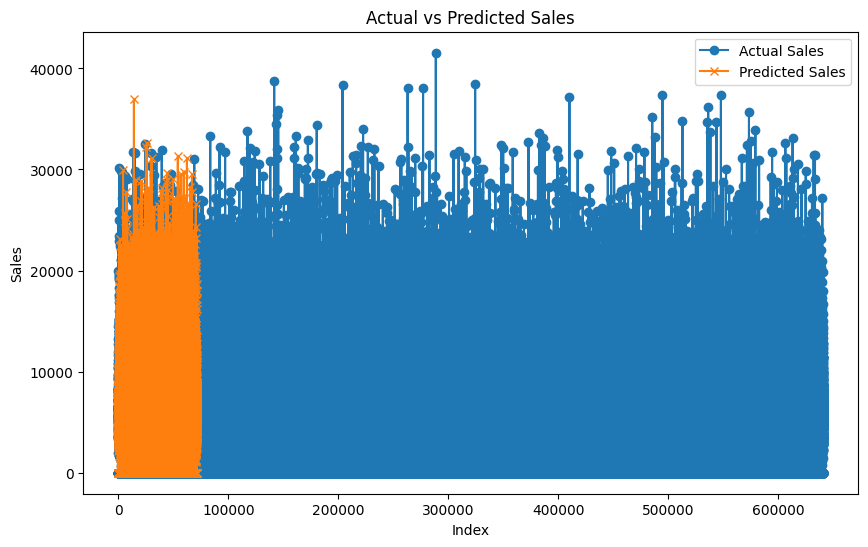

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df["sales"], label="Actual Sales", marker="o")
plt.plot(comparison_df.index, comparison_df["saless"], label="Predicted Sales", marker="x")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [35]:
test_df.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,day,month,year,saless
0,415,7,0,0,0,0,0,1,3,2015,0.00
1,27,7,0,0,0,0,0,29,12,2013,0.00
2,404,3,657,1,1,0,0,19,3,2014,6476.85
3,683,2,862,1,0,0,0,29,1,2013,7788.70
4,920,3,591,1,1,0,0,19,3,2014,5715.23


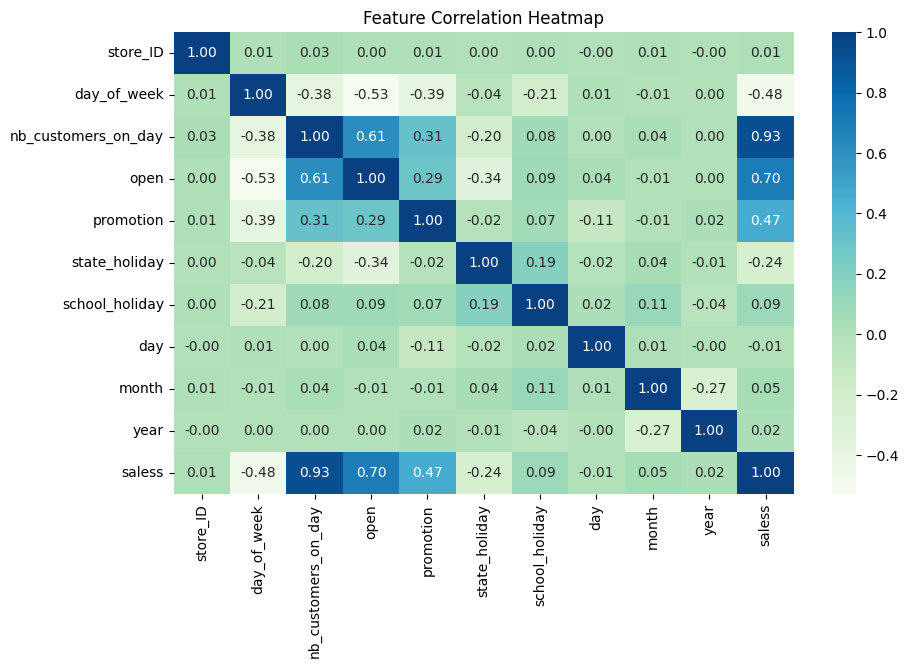

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.corr(), annot=True, cmap="GnBu", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# accuracy_score, balanced_accuracy_score, recall_score, f1_score

In [37]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score

threshold = y_train.median()  
y_test_class = (y_test > threshold).astype(int)
y_test_pred_class = (y_test_pred > threshold).astype(int)

balanced_acc = balanced_accuracy_score(y_test_class, y_test_pred_class)
recall = recall_score(y_test_class, y_test_pred_class)
f1 = f1_score(y_test_class, y_test_pred_class)
Accuracy_score = accuracy_score(y_test_class, y_test_pred_class)

print(f"Accuracy Score: {Accuracy_score}")
print(f"Balanced Accuracy Score: {balanced_acc}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Accuracy Score: 0.9201594781848823
Balanced Accuracy Score: 0.9201708707552305
Recall Score: 0.9404509118161379
F1 Score: 0.9217067964284894


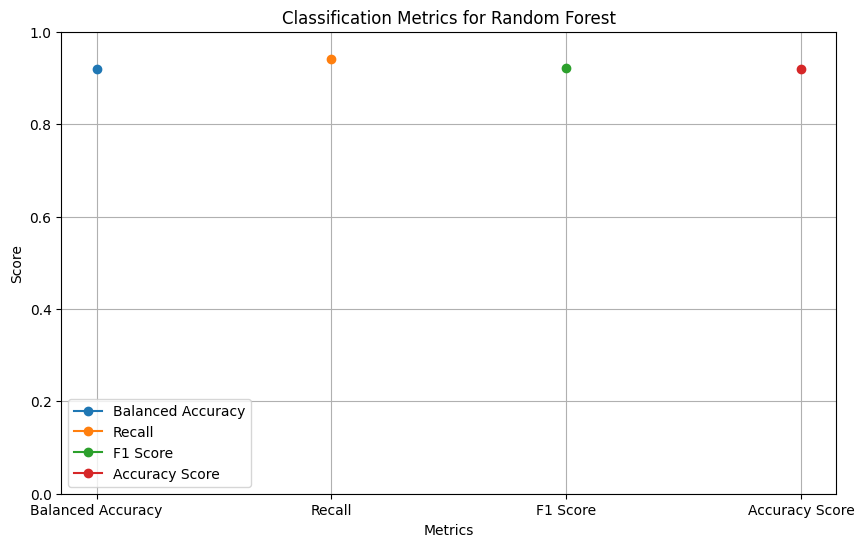

In [38]:
metrics = {
    'Balanced Accuracy': balanced_acc,
    'Recall': recall,
    'F1 Score': f1,
    'Accuracy Score': Accuracy_score
}

plt.figure(figsize=(10, 6))

for metric, value in metrics.items():
    plt.plot([metric], [value], marker='o', linestyle='-', label=metric)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title(f"Classification Metrics for {best_model_name}")
plt.ylim(0, 1) 
plt.grid(True)

plt.legend()

plt.show()